In [40]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

labels = pd.DataFrame()

In [41]:
def get_frames(l, framedict):
    deef = pd.DataFrame()

    for i in ['0','1','2','3']:

        if len(l.loc[l['label'] == int(i)]) >= framedict[i]:
            deef = pd.concat([deef,l.loc[l['label'] == int(i)].sample(framedict[i])])
        else:
            print(len(l.loc[l['label'] == int(i)]), framedict[i])
            deef = pd.concat([deef,l.loc[l['label'] == int(i)]])
    

    return deef

In [42]:
path = './data/feats_lbls/lblr6/'
df = pd.DataFrame()

framesdict = {'2': {'0': 1563, '1': 9999999, '2': 1294, '3': 9999999},\
            '1' : {'0': 999999, '1': 0, '2': 2264, '3': 2441},\
            '4' : {'0' : 999999, '1': 0, '2': 9999999, '3': 9766},\
            '3': {'0': 999999, '1': 0, '2': 3020, '3': 3255}}

for filename in os.listdir(path):
    if filename.startswith('lbls'):
        file_df = pd.read_csv(path+ 'feats' + filename[4:], header = None)
        file_df['label'] = pd.read_csv(path+ 'lbls' + filename[4:], header = None)
        df= pd.concat([df, get_frames(file_df, framesdict[filename[-5]])])


1806 999999
2740 9999999
46 9999999
2754 9999999
0 9999999
6008 9999999
0 9999999
821 999999
2491 999999
2239 9999999
0 9999999
10442 999999
2666 9999999
1292 9999999
0 9999999
733 999999
7667 9999999
0 9999999
5446 9999999
0 9999999
601 999999
896 999999
736 999999


In [43]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis = 1), df.label, test_size=0.2)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

 f1:  0.6640695235241235
              precision    recall  f1-score   support

         0.0       0.68      0.62      0.64      5945
         1.0       0.68      0.78      0.73      5570
         2.0       0.65      0.68      0.66      5978
         3.0       0.65      0.59      0.62      5866

    accuracy                           0.66     23359
   macro avg       0.66      0.67      0.66     23359
weighted avg       0.66      0.66      0.66     23359

0.5522369122059876


Text(0.5, 1.0, 'data distribution according to proposed dataset')

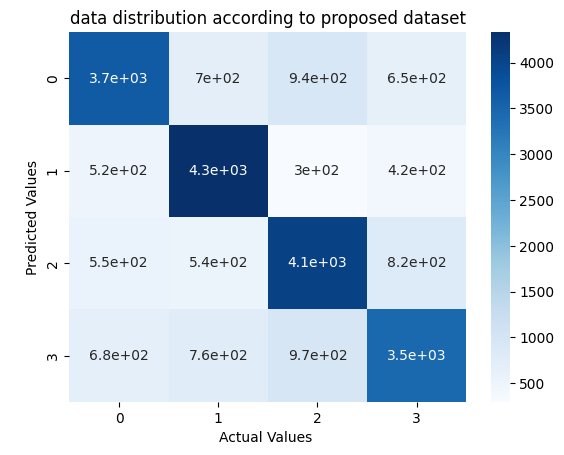

In [44]:

clf= RandomForestClassifier(n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

accuracy = []
false_negatives = []

print(" f1: ",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred))
plt.clf()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ')
ax.set_title('data distribution according to proposed dataset')